In [2]:
%pip install -q ipywidgets


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext autoreload
%autoreload now
import tempo_embeddings
import ipywidgets as widgets

#### Connect to Existing Database

In [4]:
from tempo_embeddings.embeddings.weaviate_database import WeaviateDatabaseManager

db = WeaviateDatabaseManager(db_path="weaviate_default_db", batch_size=24)
db.connect()

/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/jose/Repos/tempo-embeddings/.venv/lib/python3.9/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(
If the type is 'custom_model' or 'default' you should pass the model object under Key 'model': 'model'


True

#### Choose from Existing Collections in the DB

In [25]:
existing_colls = db.get_available_collections()
collection_selector = widgets.Dropdown(
    options=existing_colls,
    description='Collection:',
    disabled=False,
)
collection_selector

Dropdown(description='Collection:', options=('AnpSgCorpus', 'AnpDuurzaam', 'CopyOfAnpDuurzaam', 'BigAnpCollect…

#### Analyze collections

Number of records in collections:

In [26]:
collection = collection_selector.value
db.get_collection_count(collection)

276019

In [7]:
# print("Metadatas in collection (value, count) pairs")
# stats = db.get_metadata_stats(collection, include_only=["date", "year", "issue"])
# for field, val_dict in stats.items():
#     print(f"\n----- {field} -----")
#     print(sorted(val_dict.items(), key= lambda x: - x[1]))

Plot records by metadata

In [13]:
## WARNING: The DataFrame only works if the Dataset is of reasonable size (e.g. below 10K records)

corpus = db.get_corpus(collection, limit=10000)
df = corpus.to_dataframe()

print(f"Data Shape = {df.shape}")
df.head()

Data Shape = (200, 9)


,ID_DB,text,month,day,date,highlighting,year,issue,filename
0,021aa76e-d820-533e-9e79-0d653b35e667,7. gedragen als vijand van Nederland ongebrui...,6,16,06-16-1983,None,1983,32,anp_1983_06_16_32_ocr.xml
1,02d999e0-6eef-5908-b8c5-be922ae5399c,verslag over het boekjaar/ dat eind april van ...,9,11,11-09-1983,None,1983,103,anp_1983_09_11_103_ocr.xml
2,0a5efca7-5d34-5e3f-883e-74a34fdc44f7,met zijn Syrische ambtgenoot Assad. Diolomaten...,4,19,04-19-1984,None,1984,26,anp_1984_04_19_26_ocr.xml
3,0af0135c-60f2-5997-ac7b-fc980c66265a,Red.. Datum: Tijd: lugt 21-6-84 Onderwerp:...,6,21,06-21-1984,None,1984,169,anp_1984_06_21_169_ocr.xml
4,10595ed0-5796-5127-bf75-1d507f2e71a1,"strekking is gepubliceerd in Parijs, na een ve...",2,27,02-27-1984,None,1984,56,anp_1984_02_27_56_ocr.xml


In [14]:
field_selector = widgets.Dropdown(
    options=list(df.columns),
    description='Metadata Field:',
    disabled=False,
    value="year"
)
field_selector

Dropdown(description='Metadata Field:', index=6, options=('ID_DB', 'text', 'month', 'day', 'date', 'highlighti…

Distribution by year
year
1983    6328
1984    3672
Name: count, dtype: int64


<Axes: >

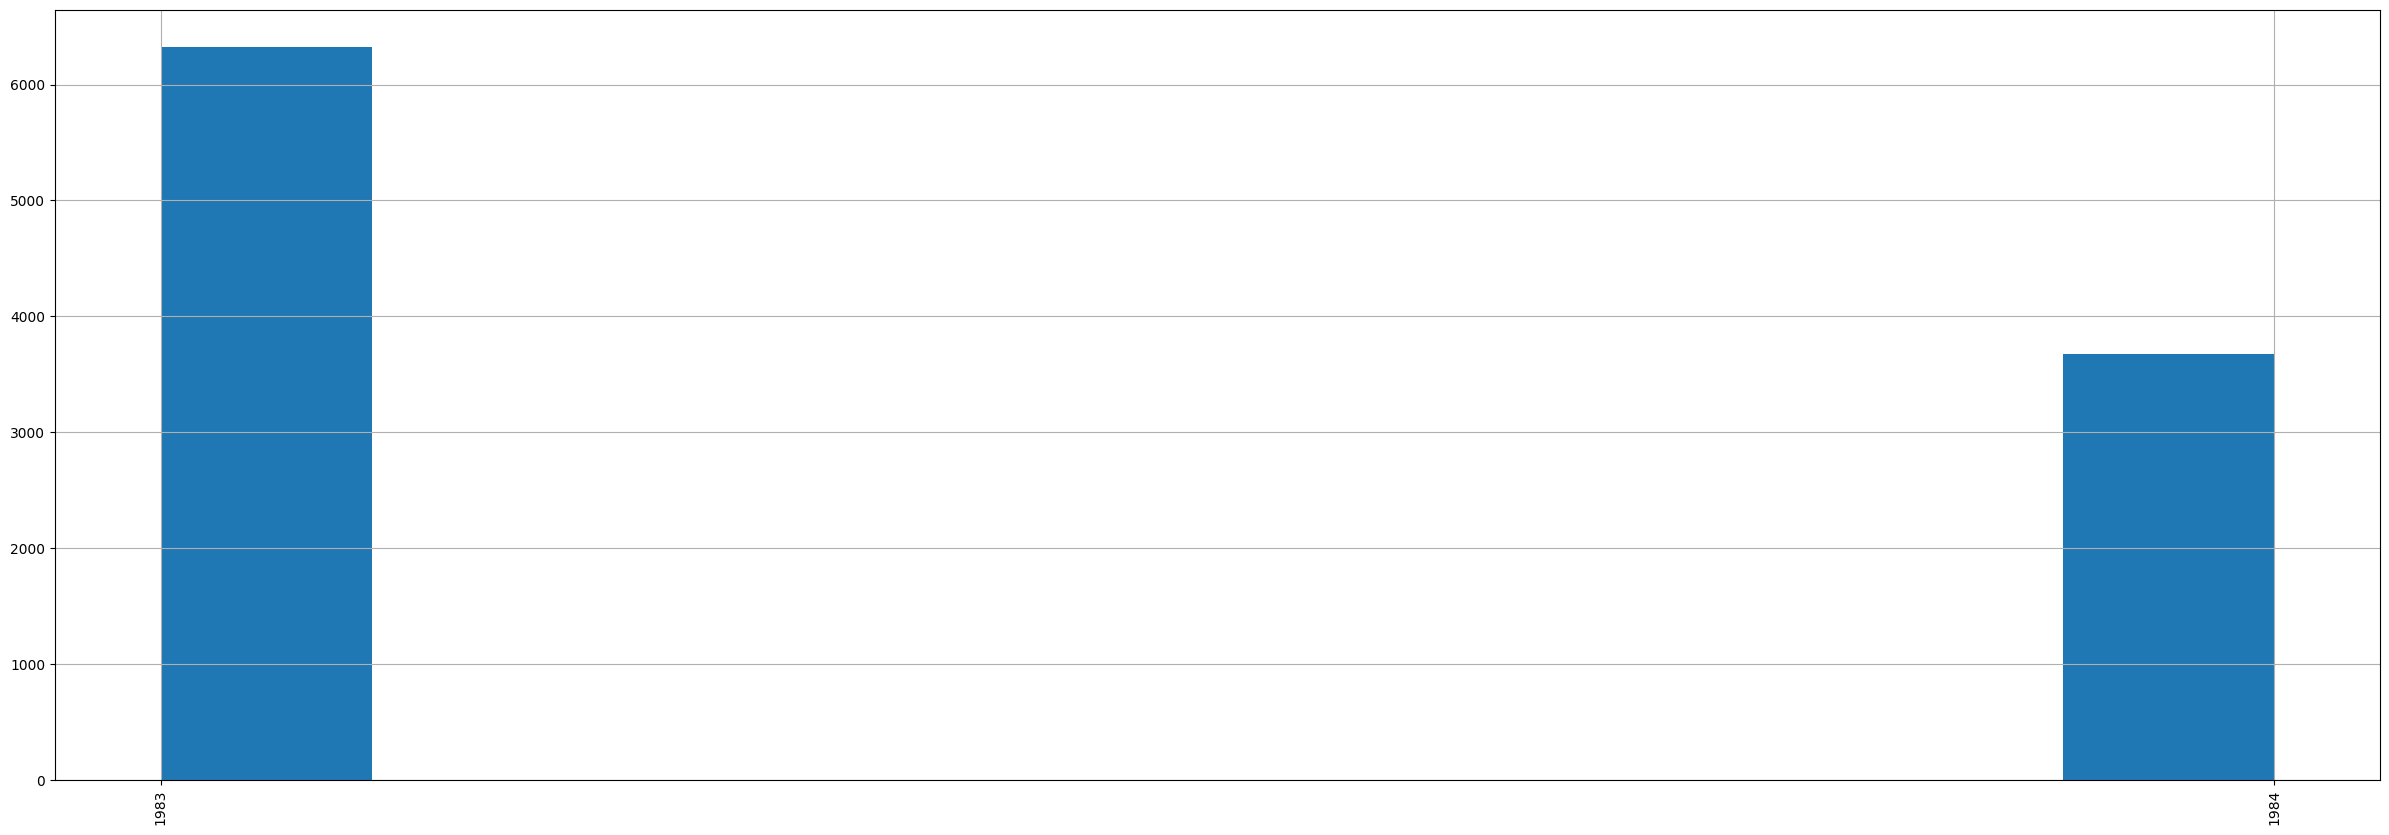

In [10]:
meta_field = field_selector.value
print(f"Distribution by {meta_field}")
print(df[meta_field].value_counts())

# df[meta_field] = df[meta_field].astype(int)

df[meta_field].sort_values().hist(xrot=90, figsize=(30,10))

## Test Importing and Exporting Collection

In [15]:
db.export_from_collection(collection)

200it [00:00, 349.04it/s]


In [19]:
db.import_into_collection("AnpDuurzaam.json.gz", "CopyOfAnpDuurzaam")

200it [00:00, 1798.15it/s]


In [22]:
db.import_into_collection("/Users/jose/test_weaviate_dump.json.gz", "BigAnpCollection")

126041it [02:25, 864.02it/s] 
